In [1]:
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda

/scratch/users/yuzhuang/miniforge3/envs/batter/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Load the conformational ensemble
state_name = 'active'
state_name = 'inactive'
u = mda.Universe(f'data/unbiased/{state_name}.pdb',
                 f'data/unbiased/{state_name}.xtc')

/scratch/users/yuzhuang/miniforge3/envs/batter/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


In [13]:
# Load the reference structure
ref = mda.Universe(f'test/{state_name}_abfe/equil/pose0/full.pdb',
                   f'test/{state_name}_abfe/equil/pose0/full.inpcrd', format='RESTRT')

In [14]:
gpcr_sel = 'protein and chainID R and name CA'
gpcr_atoms = u.select_atoms(gpcr_sel)
print(gpcr_atoms.n_atoms)

287


In [15]:
from MDAnalysis.analysis import rms, align

average = align.AverageStructure(u, u, select=gpcr_sel,
                                 ref_frame=0).run()
ref = average.results.universe

aligner = align.AlignTraj(u, ref,
                          select=gpcr_sel + ' and resid 60-150',
                          in_memory=True).run()

In [16]:
R = rms.RMSF(gpcr_atoms).run()

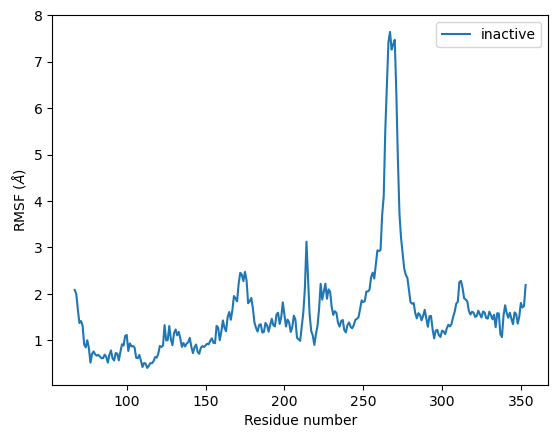

In [17]:
plt.plot(gpcr_atoms.resids, R.results.rmsf, label=state_name)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.legend()

In [18]:
# store the average position
ref.atoms.write(f'test/{state_name}_avg.pdb')

/scratch/users/yuzhuang/miniforge3/envs/batter/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/scratch/users/yuzhuang/miniforge3/envs/batter/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'elements' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/scratch/users/yuzhuang/miniforge3/envs/batter/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [19]:
# save rmsf
rmsf_values = R.results.rmsf
with open(f'test/{state_name}_rmsf.txt', 'w') as f:
    for resid, rmsf in zip(gpcr_atoms.resids, rmsf_values):
        f.write(f'{resid} {rmsf}\n')

In [20]:
!cat test/inactive_rmsf.txt

67 2.0850941696825838
68 1.9983443606003024
69 1.6599620022215442
70 1.3731916470317842
71 1.4142327691569017
72 1.320584561415834
73 0.9123685791452836
74 0.8473424936654961
75 1.00194978636189
76 0.8317821041639746
77 0.5186395537660364
78 0.7064132130840751
79 0.7593047505531401
80 0.6972343104079268
81 0.6706935943535406
82 0.6858191308781214
83 0.6514034519585018
84 0.61337367766845
85 0.616986350636669
86 0.6913773750718717
87 0.640953144852802
88 0.5197088819648442
89 0.6853173131528819
90 0.7818739150376522
91 0.6113406608310824
92 0.5649740355181905
93 0.7267851719884114
94 0.7118157759017656
95 0.5683428134900054
96 0.7510657208382923
97 0.9141365202829873
98 0.886725153890704
99 1.0933221588464395
100 1.1157303382433543
101 0.7713318476001311
102 0.9336847729723283
103 0.869501727820339
104 0.8782901444843019
105 0.8408760662963436
106 0.6238116142493467
107 0.6140204552389683
108 0.6851119478010441
109 0.5625902394197387
110 0.42498747962907046
111 0.5122373802103304
112 0.